In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IsingSolutions import ising2d_exact as ising2d_ref,ising3d_monte_carlo as ising3d_ref
from scipy.interpolate import interp1d,PchipInterpolator
from glob import glob
import numpy as np


In [2]:
filenames,exact_model=glob('./data/ising2d_X16_scan_params_scdims/*.csv'),ising2d_ref

dfs=[]
for filename in filenames:
    df=pd.read_csv(filename)
    dfs.append(df)
df=pd.concat(dfs)

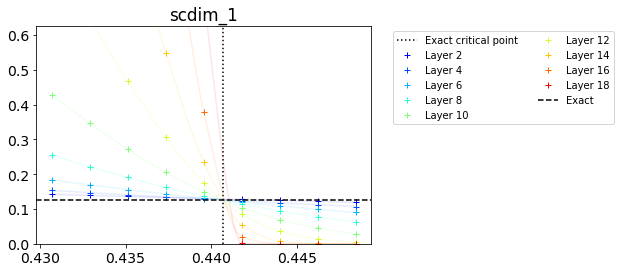

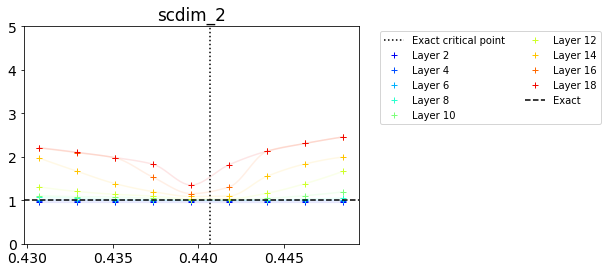

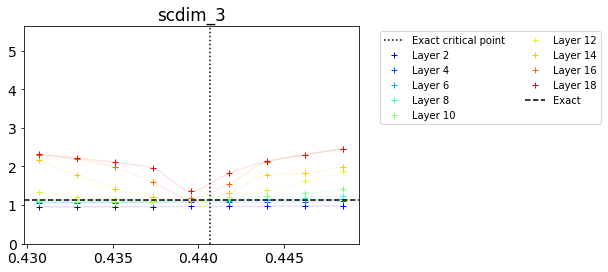

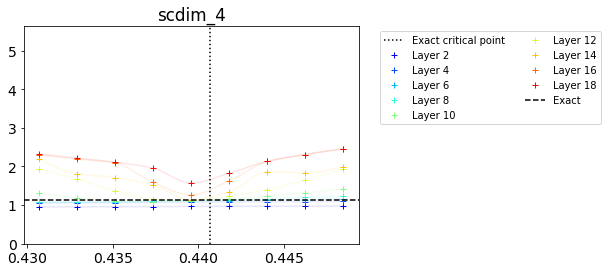

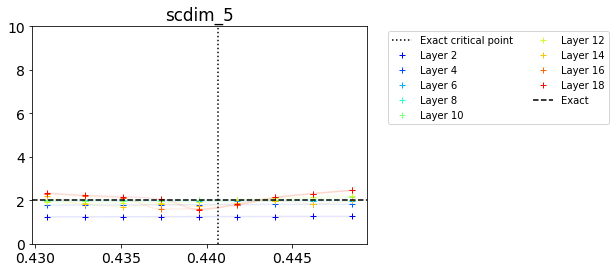

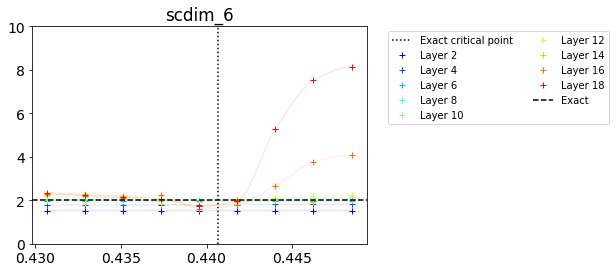

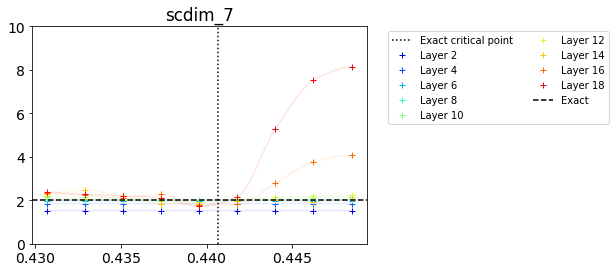

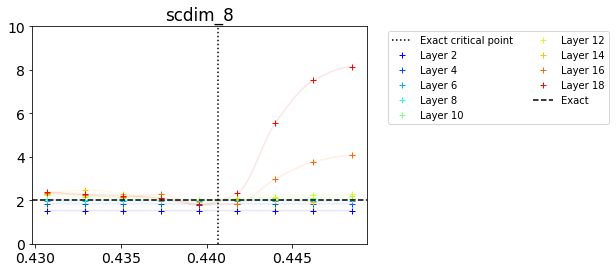

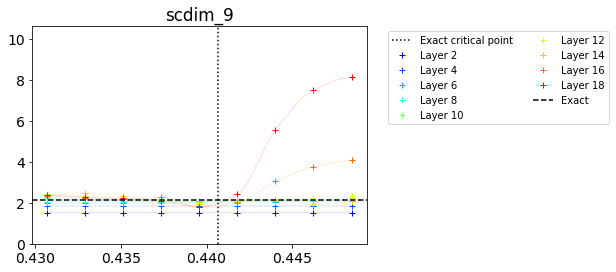

In [28]:
def plot_obs_by_layer(param_name,obs_name,exact_critical_param=None,exact_obs_func=None):
    beta_min,beta_max=df[param_name].min(),df[param_name].max()
    nLayers=20#df['iLayer'].max()+1
    iLayers=np.arange(2,nLayers,2)
    betas=np.linspace(beta_min,beta_max,100)
    cm=plt.get_cmap('jet')
    plt.rcParams.update({'font.size': 14,'legend.fontsize':10})
    plt.figure(figsize=(6,4))
    plt.title(obs_name)
    if exact_critical_param:
        plt.axvline(exact_critical_param,color='k',linestyle=':',label='Exact critical point')
    for iLayer in iLayers:
        df1=df[df['iLayer']==iLayer].sort_values(param_name)
        plt.plot(df1[param_name],df1[obs_name],'+',label='Layer %d'%iLayer,color=cm(iLayer/nLayers))
        f1=PchipInterpolator(df1[param_name],df1[obs_name])
        plt.plot(betas,f1(betas),color=cm(iLayer/nLayers,alpha=.1))
    if callable(exact_obs_func):
        plt.plot(betas,exact_obs_func(betas),color='k',linestyle='--',label='Exact')
        plt.ylim(0,np.max(exact_obs_func(betas))*5)
    elif isinstance(exact_obs_func,(float,int)):
        plt.axhline(exact_obs_func,color='k',linestyle='--',label='Exact')
        plt.ylim(0,exact_obs_func*5)
    plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_obs_by_layer('beta','scdim_1',exact_critical_param=exact_model.critical_beta,exact_obs_func=0.125)
plot_obs_by_layer('beta','scdim_2',exact_critical_param=exact_model.critical_beta,exact_obs_func=1)
plot_obs_by_layer('beta','scdim_3',exact_critical_param=exact_model.critical_beta,exact_obs_func=1.125)
plot_obs_by_layer('beta','scdim_4',exact_critical_param=exact_model.critical_beta,exact_obs_func=1.125)
plot_obs_by_layer('beta','scdim_5',exact_critical_param=exact_model.critical_beta,exact_obs_func=2)
plot_obs_by_layer('beta','scdim_6',exact_critical_param=exact_model.critical_beta,exact_obs_func=2)
plot_obs_by_layer('beta','scdim_7',exact_critical_param=exact_model.critical_beta,exact_obs_func=2)
plot_obs_by_layer('beta','scdim_8',exact_critical_param=exact_model.critical_beta,exact_obs_func=2)
plot_obs_by_layer('beta','scdim_9',exact_critical_param=exact_model.critical_beta,exact_obs_func=2.125)

In [12]:
df

,beta,h,max_dim,iLayer,scdim_0,scdim_1,scdim_2,scdim_3,scdim_4,scdim_5,scdim_6,scdim_7,scdim_8,scdim_9
0,0.437353,0,16,0,0.0,0.140789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.437353,0,16,1,0.0,0.133226,0.952292,0.963152,0.963152,1.246937,1.528516,1.528516,1.528516,1.528516
2,0.437353,0,16,2,0.0,0.133226,0.952292,0.963152,0.963152,1.246937,1.528516,1.528516,1.528516,1.528516
3,0.437353,0,16,3,0.0,0.134548,0.987962,1.069823,1.069823,1.794399,1.794399,1.844609,1.844609,1.844609
4,0.437353,0,16,4,0.0,0.134548,0.987962,1.069823,1.069823,1.794399,1.794399,1.844609,1.844609,1.844609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.435131,0,16,56,0.0,10.479418,10.489076,11.038041,11.038041,11.083034,11.083034,11.194451,11.194451,11.202168
57,0.435131,0,16,57,0.0,20.980661,21.009373,21.108704,21.140967,21.910761,21.910761,21.919780,21.919780,22.098282
58,0.435131,0,16,58,0.0,10.284636,10.290021,10.666225,10.667744,11.028922,11.058197,11.251042,11.251042,11.279705
59,0.435131,0,16,59,0.0,21.502643,21.564147,21.809183,21.917527,22.360759,22.360759,22.401852,22.401852,22.507564
